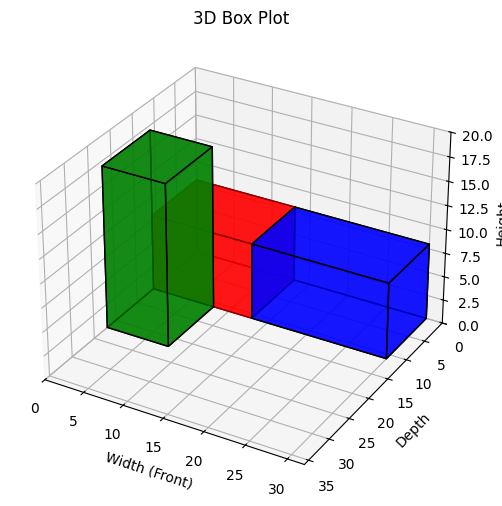

In [59]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

def plot_3d_boxes(boxes, space_dims):
    """
    Plot multiple 3D boxes in a 3D space.
    
    Parameters:
        boxes: List of dictionaries where each box is defined by:
            {
                'x': float,  # x-coordinate of the bottom-front-left corner
                'y': float,  # y-coordinate of the bottom-front-left corner
                'z': float,  # z-coordinate of the bottom-front-left corner
                'l': float,  # length (along x-axis)
                'w': float,  # width (along y-axis)
                'h': float,  # height (along z-axis)
                'color': str  # color of the box
            }
        space_dims: Tuple of (length, width, height) for the 3D space.
    """
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')

    # Draw 3D space boundary
    ax.set_xlim(0, space_dims[0])
    ax.set_ylim(space_dims[1], 0)
    ax.set_zlim(0, space_dims[2])
    ax.set_xlabel('Width (Front)')
    ax.set_ylabel('Depth')
    ax.set_zlabel('Height')
    ax.set_title('3D Box Plot')

    for box in boxes:
        x, y, z = box['x'], box['y'], box['z']
        l, w, h = box['l'], box['w'], box['h']
        color = box['color']
        label = box['label']

        # Define the vertices of the box
        vertices = [
            [x, y, z],
            [x + w, y, z],
            [x + w, y + l, z],
            [x, y + l, z],
            [x, y, z + h],
            [x + w, y, z + h],
            [x + w, y + l, z + h],
            [x, y + l, z + h]
        ]

        # Define the 6 faces of the box
        faces = [
            [vertices[0], vertices[1], vertices[5], vertices[4]],  # Bottom face
            [vertices[1], vertices[2], vertices[6], vertices[5]],  # Front face
            [vertices[2], vertices[3], vertices[7], vertices[6]],  # Top face
            [vertices[0], vertices[4], vertices[7], vertices[3]],  # Back face
            [vertices[0], vertices[1], vertices[2], vertices[3]],  # Left face
            [vertices[4], vertices[5], vertices[6], vertices[7]]   # Right face
        ]

        # Add the box to the plot
        if box['type'] == 'old':
            ax.add_collection3d(Poly3DCollection(faces, facecolors=color, edgecolors = 'darkred', linewidths=1, alpha=0.7))
        else:
            ax.add_collection3d(Poly3DCollection(faces, facecolors=color, edgecolors='black', linewidths=1, alpha=0.7))

    plt.show()


# Example Usage
space_dims = (32, 36, 20)  # 3D space dimensions (width, length, height)

# Define some 3D boxes
boxes = [
    {'x': 0, 'y': 0, 'z': 0, 'l': 11, 'w': 13, 'h': 8, 'color': 'red', 'type':'old', 'label': 'existing SKU cases'},  # Box 1
    {'x': 0, 'y': 11, 'z': 0, 'l': 11, 'w': 8, 'h': 17, 'color': 'green', 'type':'new', 'label':'main'},  # Box 2
    {'x': 13, 'y': 0, 'z': 0, 'l': 11, 'w': 17, 'h': 8, 'color': 'blue', 'type':'new', 'label':'sub'}   # Box 3
]

# Plot the boxes in the space
plot_3d_boxes(boxes, space_dims)
